In [1]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt 

In [2]:
drug = pd.read_csv("./drug200.csv", skipinitialspace= True)
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
drug["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
drug["Drug"] = drug["Drug"].replace("DrugY", "drugY")

In [5]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
drug.duplicated().sum()

0

In [8]:
drug.drop_duplicates(inplace= True)

In [9]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [10]:
drug.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
drug.dropna(inplace= True)

In [12]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [13]:
drug["Sex"].unique()

array(['F', 'M'], dtype=object)

In [14]:
drug["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [15]:
drug["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [16]:
drug["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [17]:
drug.to_excel("./drug.xlsx")

In [18]:
drugfilt = drug["Sex"] == "M"
df = drug.loc[drugfilt]
df 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
...,...,...,...,...,...,...
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX


In [19]:
druggroup = df.groupby(["BP"])
dg = druggroup["BP"].count().rename_axis("BP").reset_index(name = "Total")
dg.sort_values(by= "Total",ascending= False, inplace=True)
dg

,BP,Total
0,HIGH,39
1,LOW,36
2,NORMAL,29


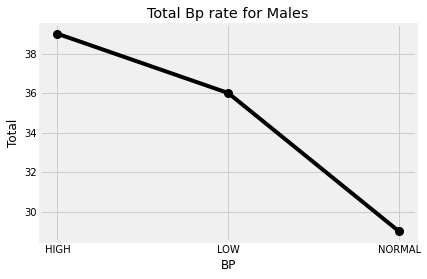

In [20]:
x = dg["BP"].tolist()
y = dg["Total"].tolist()
plt.style.use("fivethirtyeight")
plt.plot(x, y, color = "black", marker = ".", markersize = 16)
plt.rcParams["figure.figsize"] = (12,6) 
plt.xlabel("BP")
plt.ylabel("Total")
plt.title("Total Bp rate for Males")
plt.show();

In [21]:
drugfilt1 = drug["Sex"] == "F"
df1 = drug.loc[drugfilt1]
df1 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
...,...,...,...,...,...,...
184,18,F,HIGH,HIGH,37.188,drugY
185,57,F,NORMAL,NORMAL,25.893,drugY
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC


In [22]:
druggroup1 = df1.groupby(["BP"])
dg1 = druggroup1["BP"].count().rename_axis("BP").reset_index(name = "Total")
dg1.sort_values(by= "Total",ascending= False, inplace=True)
dg1 

,BP,Total
0,HIGH,38
2,NORMAL,30
1,LOW,28


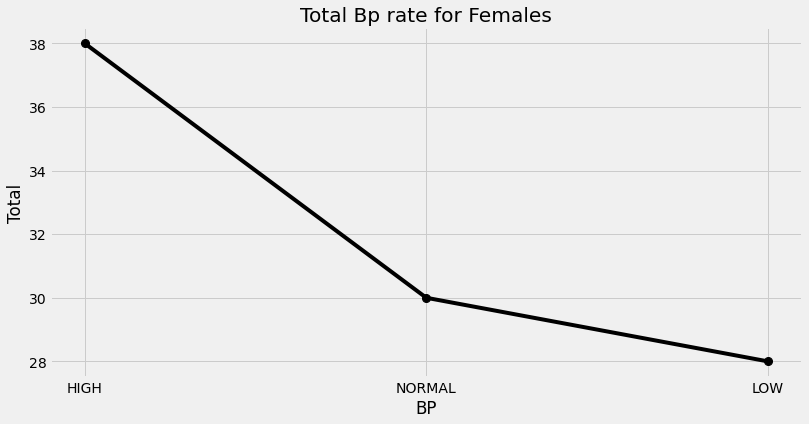

In [23]:
a = dg1["BP"].tolist()
b = dg1["Total"].tolist()
plt.style.use("fivethirtyeight")
plt.plot(a, b, color = "black", marker = ".", markersize = 16)
plt.rcParams["figure.figsize"] = (12,6) 
plt.xlabel("BP")
plt.ylabel("Total")
plt.title("Total Bp rate for Females")
plt.show();

In [24]:
drugfilt2 = drug["Sex"] == "F"
df2 = drug.loc[drugfilt2]
df2 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
...,...,...,...,...,...,...
184,18,F,HIGH,HIGH,37.188,drugY
185,57,F,NORMAL,NORMAL,25.893,drugY
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC


In [25]:
druggroup2 = df2.groupby(["Cholesterol"])
dg2 = druggroup2["BP"].count().rename_axis("BP").reset_index(name = "Total")
dg2.sort_values(by= "Total",ascending= False, inplace=True)
dg2 

,BP,Total
0,HIGH,49
1,NORMAL,47


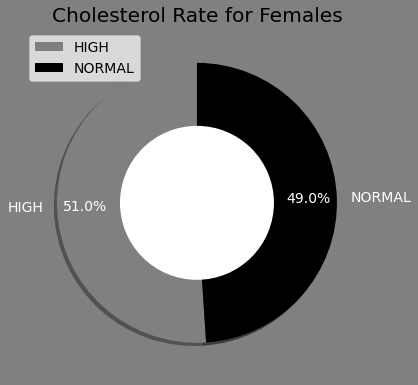

In [26]:
g = dg2["BP"].tolist()
h = dg2["Total"].tolist()
cols = ["grey", "black"]
plt.style.use("fivethirtyeight")
fig = plt.figure()
fig.patch.set_facecolor("grey")
plt.pie(h, labels = g, colors = cols, startangle = 90, shadow = True, explode = (0, 0), autopct = "%1.1f%%", pctdistance=0.80, textprops= {"color":"w"})
centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Cholesterol Rate for Females")
plt.legend()
plt.rcParams["figure.figsize"] = (20,20)
plt.show();

In [27]:
drugfilt3 = drug["Sex"] == "M"
df3 = drug.loc[drugfilt3]
df3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
...,...,...,...,...,...,...
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX


In [28]:
druggroup3 = df2.groupby(["Cholesterol"])
dg3 = druggroup3["BP"].count().rename_axis("BP").reset_index(name = "Total")
dg3.sort_values(by= "Total",ascending= False, inplace=True)
dg2 

,BP,Total
0,HIGH,49
1,NORMAL,47


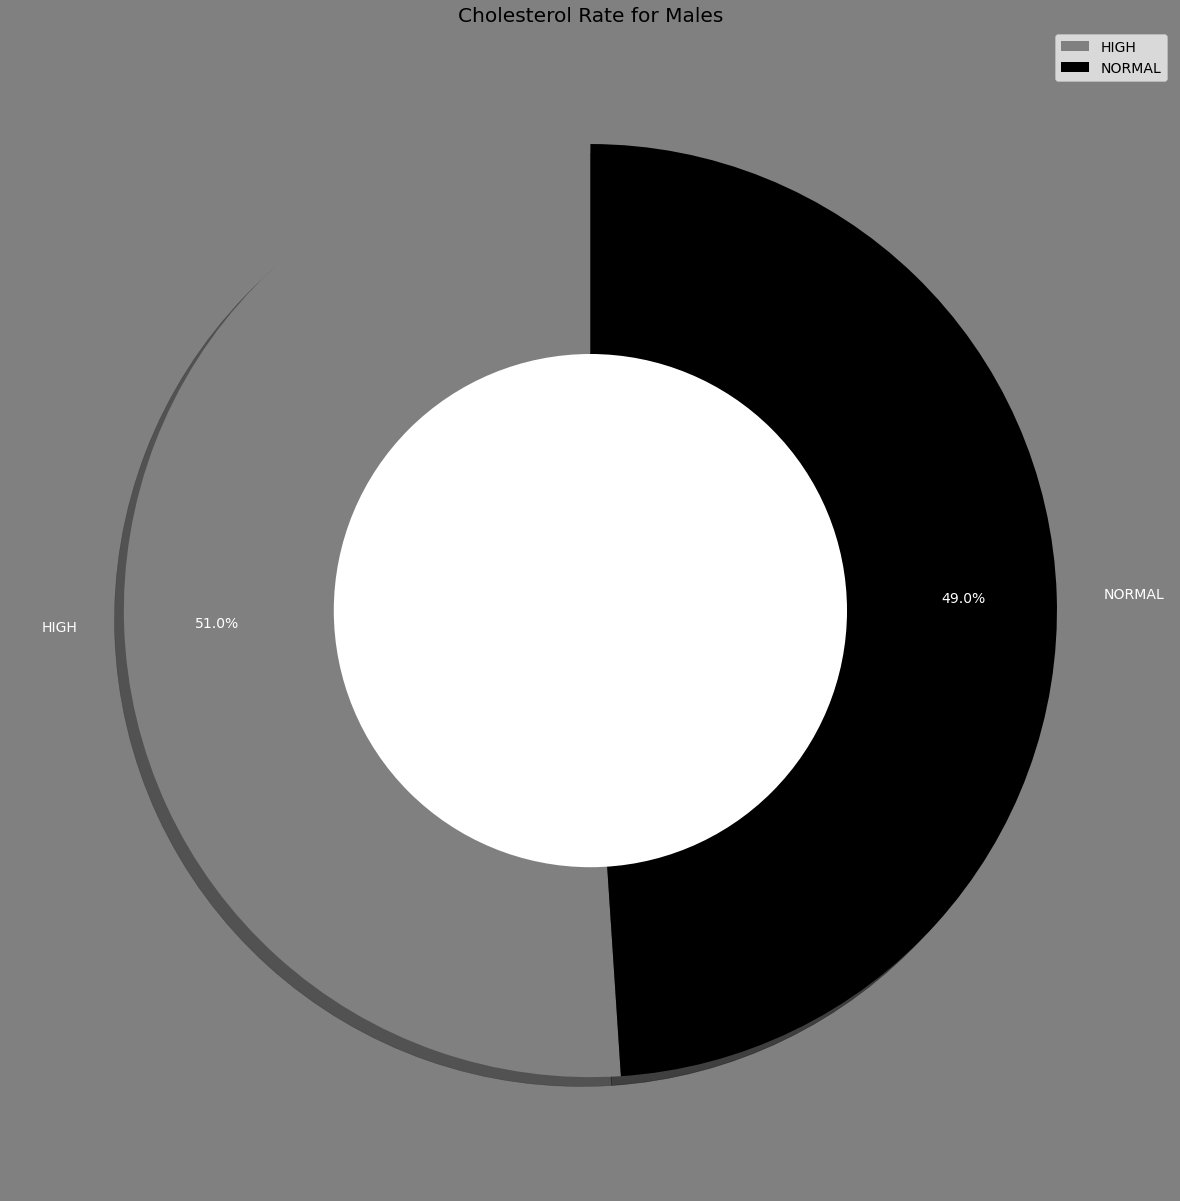

In [29]:
i = dg3["BP"].tolist()
j = dg3["Total"].tolist()
cols = ["grey", "black"]
plt.style.use("fivethirtyeight")
fig = plt.figure()
fig.patch.set_facecolor("grey")
plt.pie(h, labels = g, colors = cols, startangle = 90, shadow = True, explode = (0, 0), autopct = "%1.1f%%", pctdistance=0.80, textprops= {"color":"w"})
centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)
plt.title("Cholesterol Rate for Males")
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show(); 

In [30]:
ch = drug["Cholesterol"].value_counts().rename_axis("Cholesterol").reset_index(name = "count")
ch 

,Cholesterol,count
0,HIGH,103
1,NORMAL,97


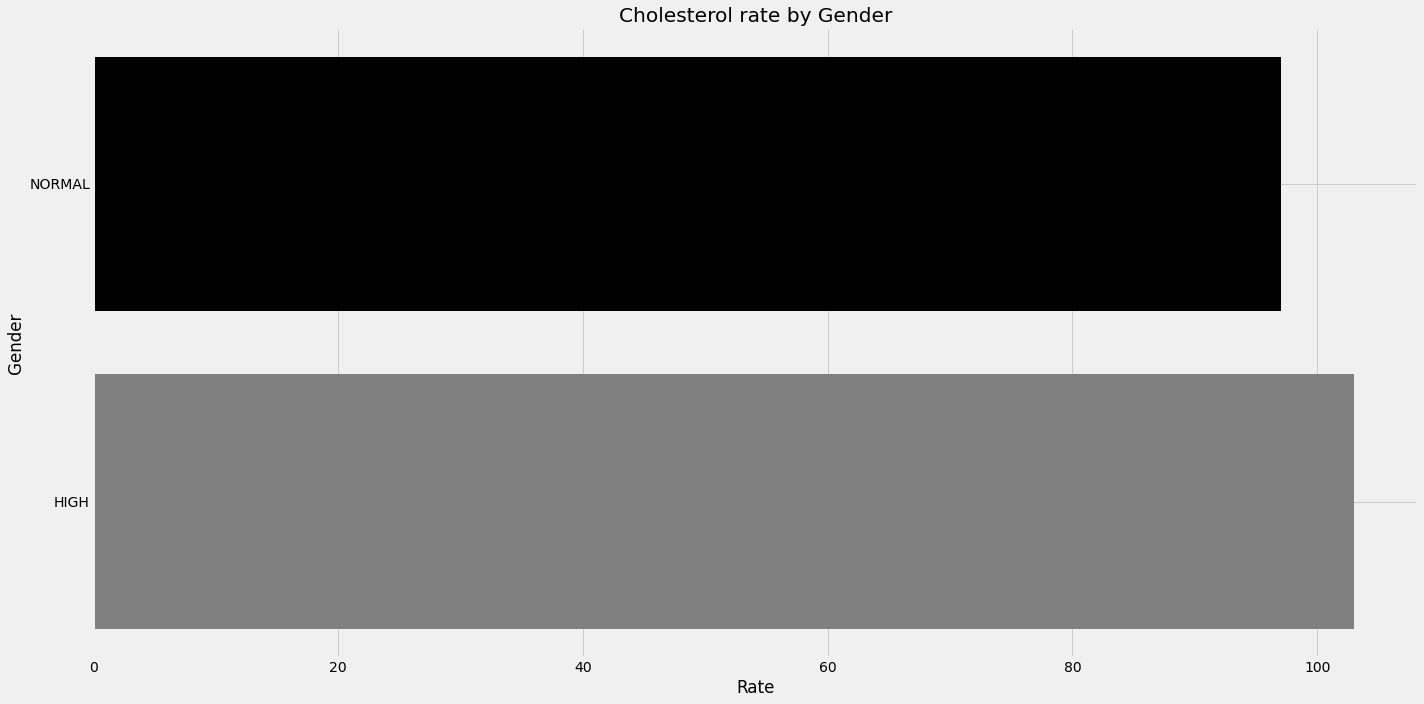

In [31]:
k = ch["Cholesterol"].tolist()
l = ch["count"].tolist()
col = ["grey", "black"]
plt.style.use("fivethirtyeight")
plt.barh(k, l, color = col)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Cholesterol rate by Gender")
plt.ylabel("Gender")
plt.xlabel("Rate")
plt.tight_layout()
plt.show();

In [32]:
drug["dr"] = drug.index
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,dr
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,2
3,28,F,NORMAL,HIGH,7.798,drugX,3
4,61,F,LOW,HIGH,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,195
196,16,M,LOW,HIGH,12.006,drugC,196
197,52,M,NORMAL,HIGH,9.894,drugX,197
198,23,M,NORMAL,NORMAL,14.020,drugX,198


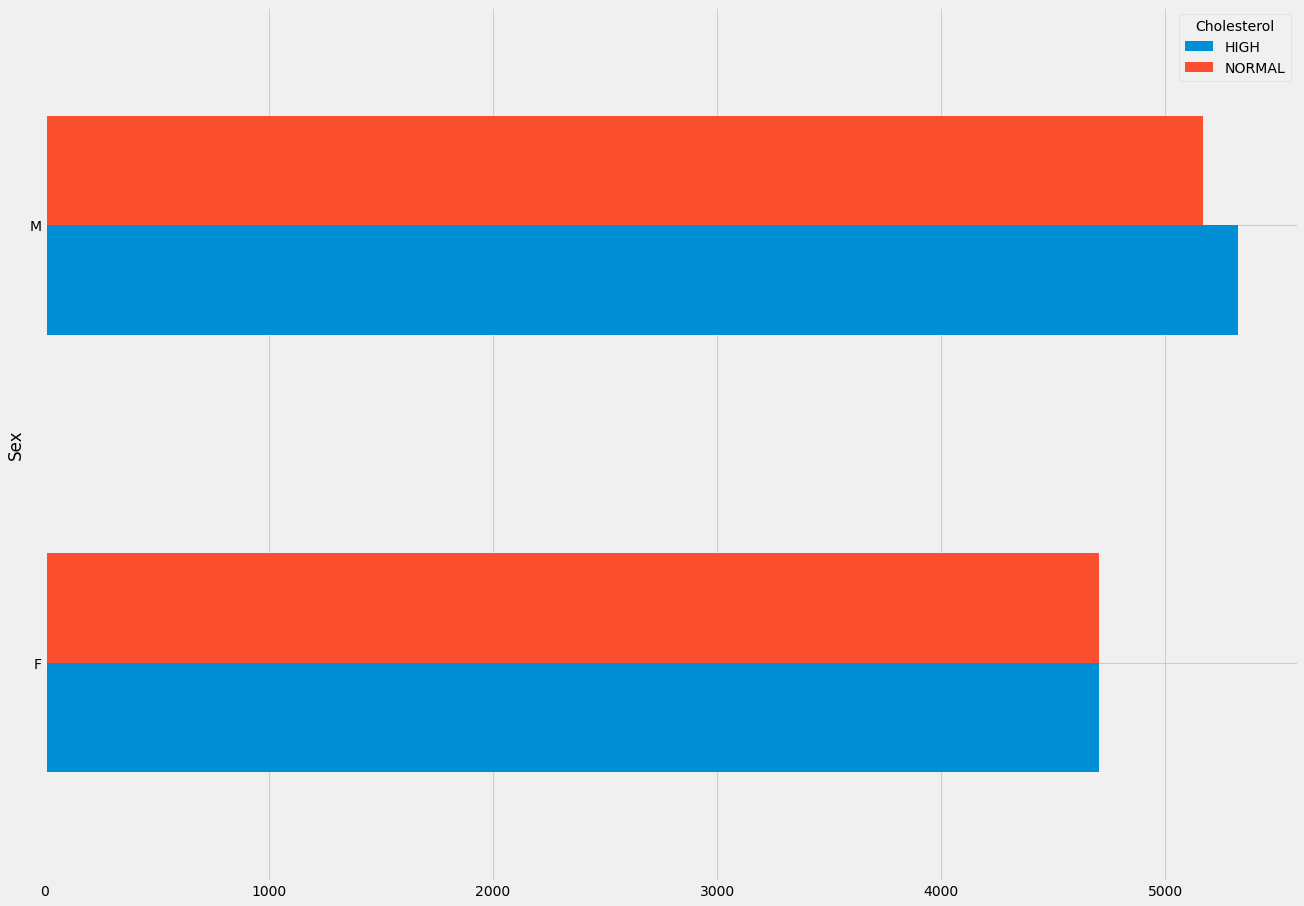

In [33]:
fed = drug.pivot_table(index = drug["Sex"], columns = drug["Cholesterol"], values = "dr", aggfunc = "sum")
fed.plot.barh(figsize = (20, 15));

In [34]:
druggroup4 = drug.groupby(["Sex"])
dg4 = druggroup4["Na_to_K"].sum().rename_axis("sex").reset_index(name = "Total")
dg4.sort_values(by= "Total",ascending= False, inplace=True)
dg4 

,sex,Total
0,F,1634.118
1,M,1582.779


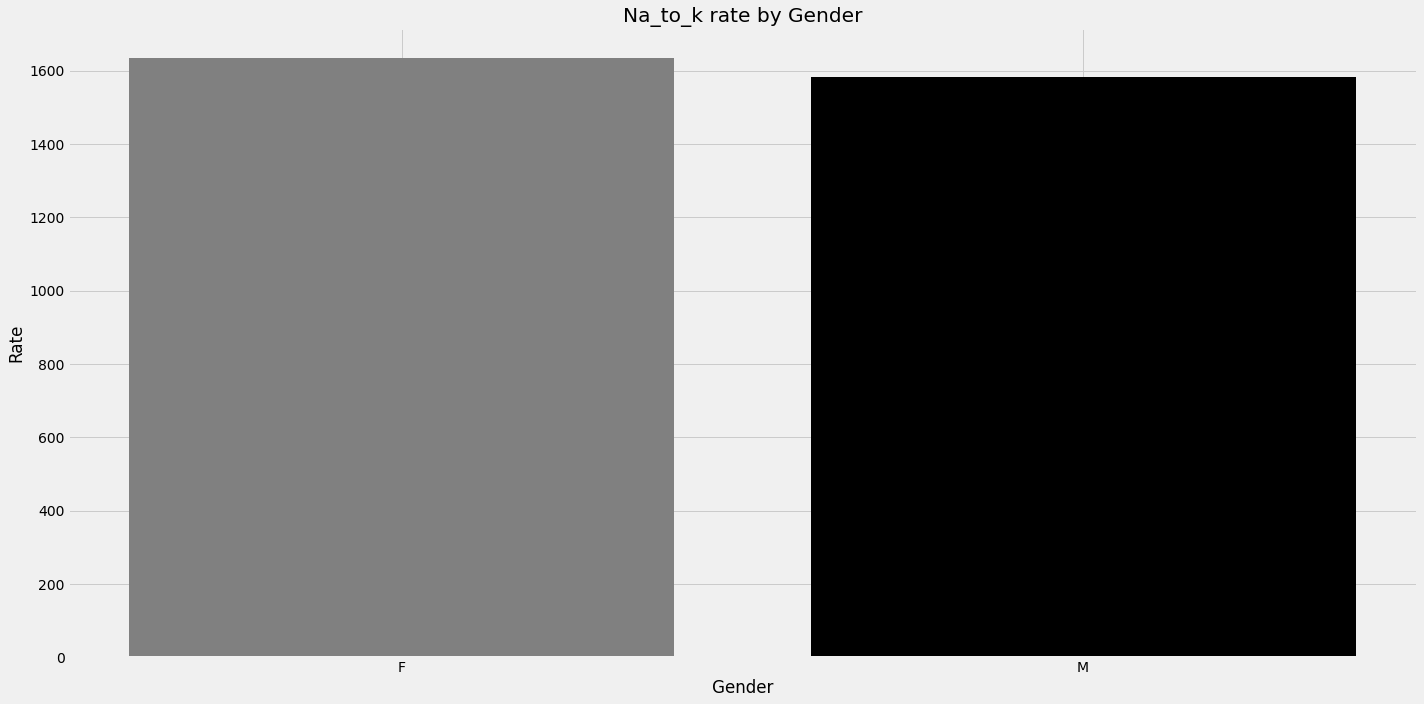

In [35]:
m = dg4["sex"].tolist()
n = dg4["Total"].tolist()
col = ["grey", "black"]
plt.style.use("fivethirtyeight")
plt.bar(m, n, color = col)
plt.rcParams["figure.figsize"] = (20,12)
plt.title("Na_to_k rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Rate")
plt.tight_layout()
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


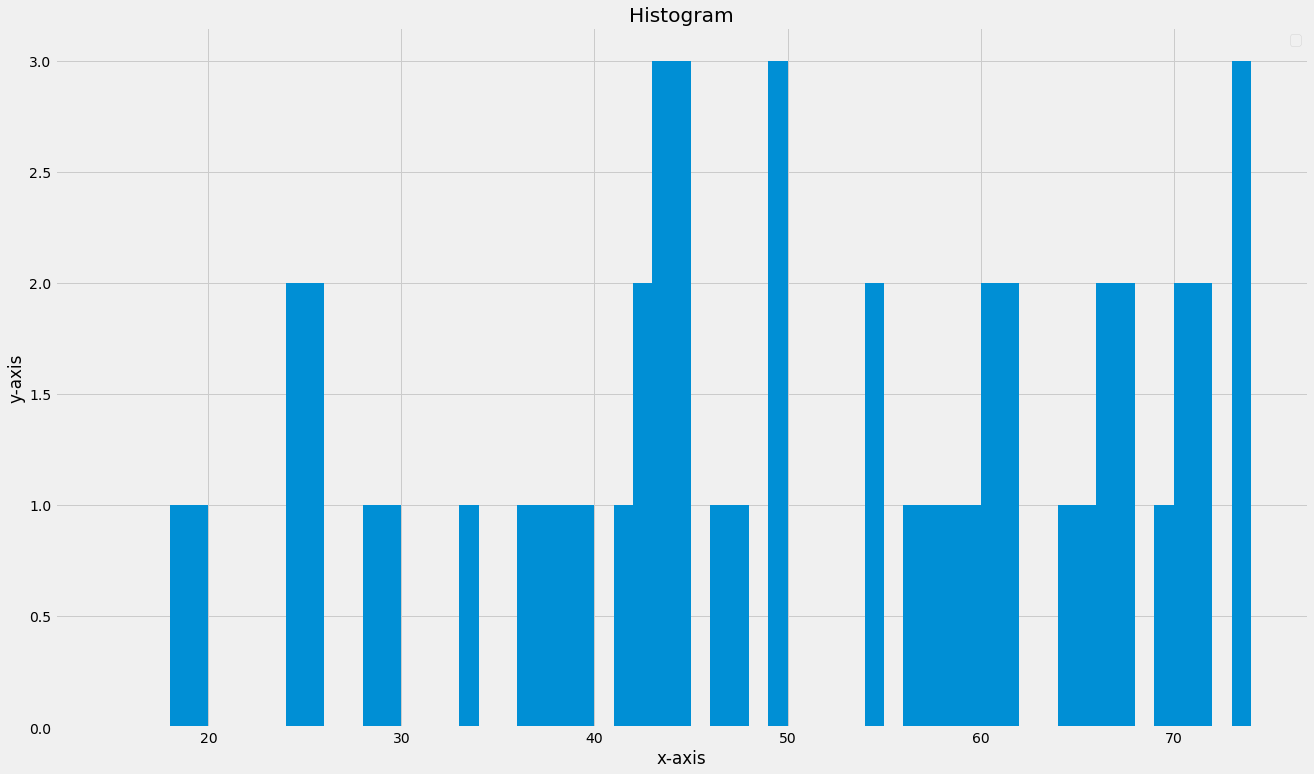

In [36]:
groups = drug.groupby(["Age"])
ag = groups["Na_to_K"].sum().rename_axis("age").reset_index(name = "Total")


o = ag["age"].tolist()
p = ag["Total"].tolist()
plt.hist(p, o, histtype = "bar", rwidth = 1.0)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Histogram")
plt.legend()
plt.show();

In [37]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,dr
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,2
3,28,F,NORMAL,HIGH,7.798,drugX,3
4,61,F,LOW,HIGH,18.043,drugY,4


In [38]:
drug.drop(["dr"], axis=1, inplace= True)
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [39]:
# Machine learning algorithm to make predictions
# random forest algorithm
x = drug[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = drug[["Drug"]]

from sklearn.preprocessing import LabelEncoder
x["Sex"] = LabelEncoder().fit_transform(x["Sex"])
x["BP"] = LabelEncoder().fit_transform(x["BP"])
x["Cholesterol"] = LabelEncoder().fit_transform(x["Cholesterol"])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators= 20, random_state= 0)


rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test) 
y_pred

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)) 

C:\Users\DELL LATITUDE E5270\AppData\Local\Temp\ipykernel_10952\2868711609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Sex"] = LabelEncoder().fit_transform(x["Sex"])
C:\Users\DELL LATITUDE E5270\AppData\Local\Temp\ipykernel_10952\2868711609.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["BP"] = LabelEncoder().fit_transform(x["BP"])
C:\Users\DELL LATITUDE E5270\AppData\Local\Temp\ipykernel_10952\2868711609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

1.0


C:\Users\DELL LATITUDE E5270\AppData\Local\Temp\ipykernel_10952\2868711609.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd.fit(X_train, y_train)


In [40]:
y_pred

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX'], dtype=object)

In [41]:
print(accuracy_score(y_test, y_pred))

1.0
